<a target="_blank" href="https://colab.research.google.com/github/jgromero/dasoc-ap/blob/main/dogsVScats/dogsVScats.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

# Clasificación con _perros y gatos_

Ejemplo basado en _Deep Learning with Python (2nd edition)_, capítulo 8.

## Descargar datos

Descargar y descomprimir [fichero de datos](https://drive.google.com/open?id=1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b&usp=drive_fs).

In [1]:
import os
import zipfile

if not os.path.exists('cats_and_dogs_small'):
    !gdown 1b4QltMyV7O5HUfxmVeOwbHwVjaqjvq_b

    with zipfile.ZipFile('cats_and_dogs_small.zip', 'r') as zip_ref:
        zip_ref.extractall()

    folders = os.listdir('cats_and_dogs_small')
    print(folders)

Configurar directorios.

In [2]:
train_dir      = './cats_and_dogs_small/train/'
validation_dir = './cats_and_dogs_small/validation/'
test_dir       = './cats_and_dogs_small/test/'

Revisar imágenes.

(-0.5, 311.5, 395.5, -0.5)

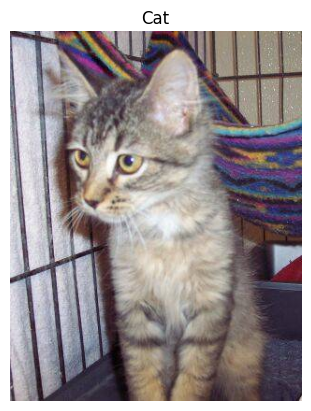

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(train_dir + 'cats/cat.2.jpg')
plt.imshow(img)
plt.title('Cat')
plt.axis('off')


## Entrenar CNN para clasificación

### Definir componentes para la carga de imágenes

Definir conjuntos de datos (_dataset from directory_).

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    directory=validation_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(150, 150),
    batch_size=32
)

Found 4000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Definir la arquitectura de la red neuronal

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [6]:
model.build(input_shape=(None, (150, 150, 3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenar la red neuronal

Configurar entrenamiento.

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Entrenar.

In [8]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset
)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.5162 - loss: 13.4176 - val_accuracy: 0.5100 - val_loss: 0.6891
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.5798 - loss: 0.6612 - val_accuracy: 0.5960 - val_loss: 0.6682
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.6498 - loss: 0.6189 - val_accuracy: 0.5790 - val_loss: 0.7101
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7269 - loss: 0.5376 - val_accuracy: 0.6230 - val_loss: 0.7638
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8168 - loss: 0.3964 - val_accuracy: 0.6340 - val_loss: 0.8996
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8669 - loss: 0.2984 - val_accuracy: 0.6030 - val_loss: 1.1564
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9289 - loss: 0.1754 - val_accuracy: 0.6200 - val_loss: 1.4121
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9576 - loss: 0.1162 - va

Observar convergencia del modelo.

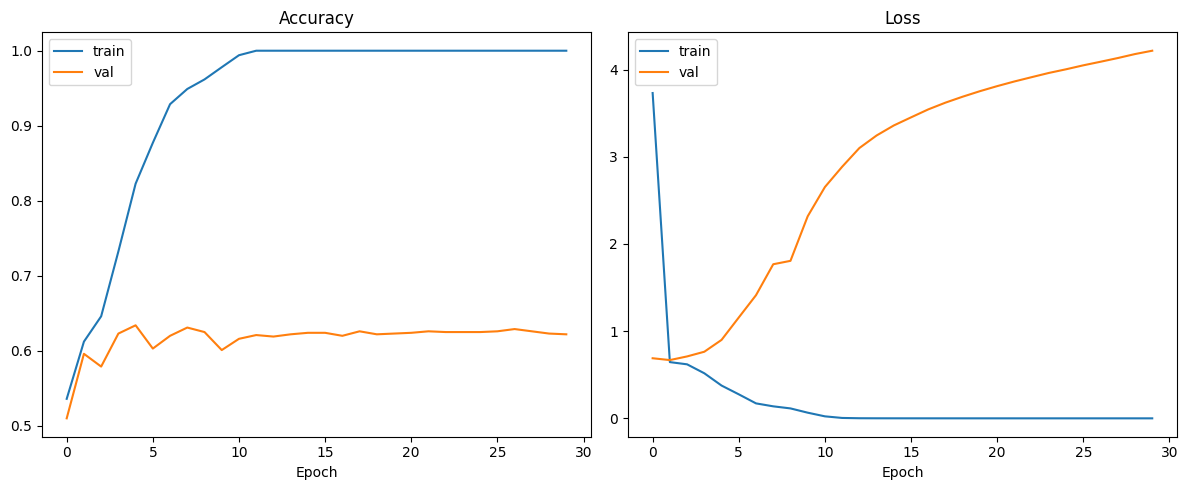

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Calcular métricas con conjunto de test

In [10]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6259 - loss: 4.2337
Test Loss: 4.0711846351623535
Test Accuracy: 0.6395000219345093


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


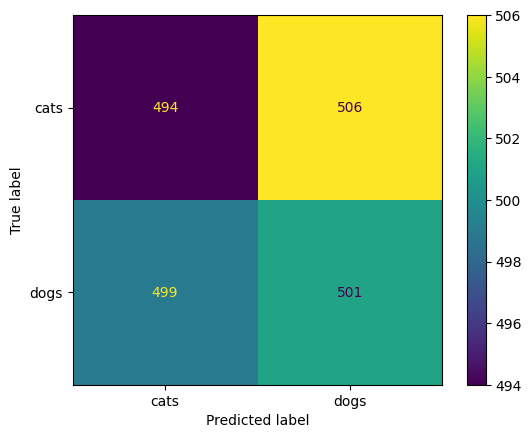

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtener clase real de cada instancia del conjunto de test
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Realizar predicción
y_pred = model.predict(test_dataset)

# Convertir predicciones en [0, 1] a {0, 1} - umbral 0.5
y_pred_classes = (y_pred > 0.5).astype(float)

# Calcular y mostrar matriz de contingencia
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot()

## Aumento de datos

Añadir capas de aumento de datos basadas en transformaciones de las imágenes: [`RandomFlip`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/), [`RandomRotation`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/), [`RandomZoom`](https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/).

Se pueden encontrar más capas de aumento para imágenes [aquí](https://keras.io/api/layers/preprocessing_layers/image_augmentation/).

In [12]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

model = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.5048 - loss: 8.7646 - val_accuracy: 0.4880 - val_loss: 0.6939
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5082 - loss: 0.6952 - val_accuracy: 0.5200 - val_loss: 0.6920
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5229 - loss: 0.6907 - val_accuracy: 0.5070 - val_loss: 0.6926
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.5196 - loss: 0.6896 - val_accuracy: 0.5340 - val_loss: 0.6858
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5282 - loss: 0.6892 - val_accuracy: 0.5170 - val_loss: 0.6893
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5173 - loss: 0.6911 - val_accuracy: 0.5230 - val_loss: 0.6924
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5129 - loss: 0.6935 - val_accuracy: 0.5250 - val_loss: 0.6889
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.5138 - loss: 0.6924 

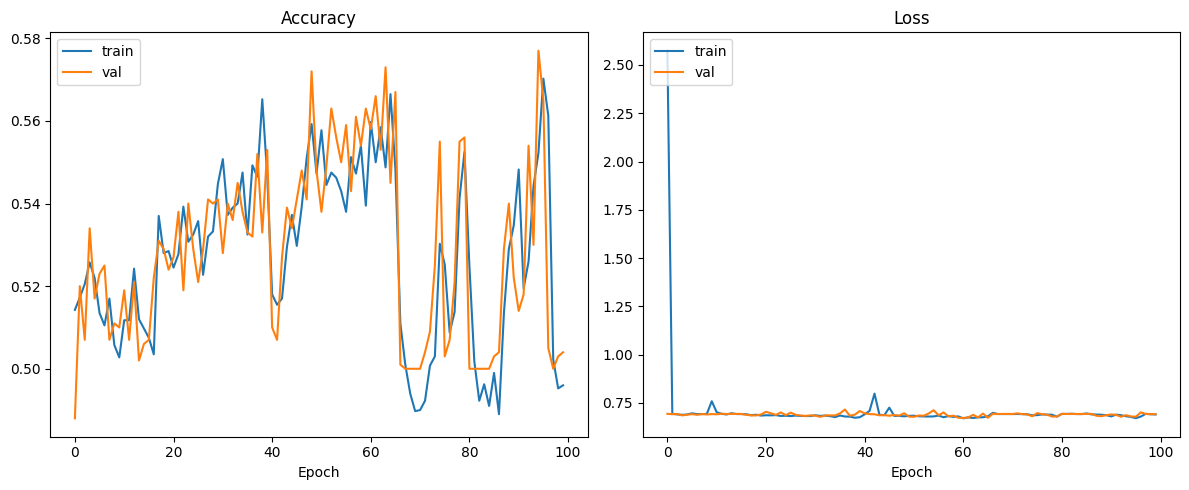

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## _Early stopping_

El soporte para _early stopping_ se realiza mediante el _callback_ [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/).

Un _callback_ es un "conector" donde se pueden "enchufar" diferentes funcionalidades, normalmente ya predefinidas, para que recojan información o modifiquen la forma en que se realiza el `fit`. Así, los _callbacks_ permiten cierta interacción con el `fit` en algunos pasos del proceso.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5140 - loss: 0.6908 - val_accuracy: 0.5560 - val_loss: 0.6798
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5697 - loss: 0.6805 - val_accuracy: 0.5770 - val_loss: 0.6724
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5549 - loss: 0.6738 - val_accuracy: 0.5630 - val_loss: 0.6884
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5721 - loss: 0.6693 - val_accuracy: 0.5500 - val_loss: 0.6719
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5696 - loss: 0.6627 - val_accuracy: 0.5470 - val_loss: 0.6848
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5815 - loss: 0.6648 - val_accuracy: 0.5580 - val_loss: 0.6726
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.5883 - loss: 0.6555 - val_accuracy: 0.5920 - val_loss: 0.6677
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5877 - loss: 0.6562 

Se pueden añadir varios _callbacks_ a la ejecución. Por ejemplo, se puede incluir el [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) para guardar el mejor modelo encontrado durante todo el entrenamiento, con sus pesos asociados, según la métrica seleccionada.

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath="convnet_dogsVScats.keras",
    save_best_only=True,
    monitor="val_loss"
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.6146 - loss: 0.6361 - val_accuracy: 0.5940 - val_loss: 0.6671
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.6199 - loss: 0.6277 - val_accuracy: 0.5950 - val_loss: 0.6935
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.6342 - loss: 0.6278 - val_accuracy: 0.5740 - val_loss: 0.6980
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.6274 - loss: 0.6322 - val_accuracy: 0.5900 - val_loss: 0.6930
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6407 - loss: 0.6247 - val_accuracy: 0.5770 - val_loss: 0.6825
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6313 - loss: 0.6307 - val_accuracy: 0.6140 - val_loss: 0.6853


## Regularización, normalización y _dropout_

Finalmente, podemos incorporar varias mejoras centradas en la modificación del proceso de aprendizaje.

In [21]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.2),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath="convnet_dogsVScats.keras",
    save_best_only=True,
    monitor="val_loss"
)

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5796 - loss: 2.3077 - val_accuracy: 0.5450 - val_loss: 2.4094
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.6442 - loss: 1.9313 - val_accuracy: 0.6800 - val_loss: 1.7229
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7014 - loss: 1.6434 - val_accuracy: 0.6170 - val_loss: 1.6517
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7115 - loss: 1.4701 - val_accuracy: 0.5270 - val_loss: 2.1185
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7390 - loss: 1.3145 - val_accuracy: 0.6670 - val_loss: 1.3064
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.7627 - loss: 1.1780 - val_accuracy: 0.7050 - val_loss: 1.1874
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7675 - loss: 1.0718 - val_accuracy: 0.7270 - val_loss: 1.0570
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.7844 - loss: 0.9

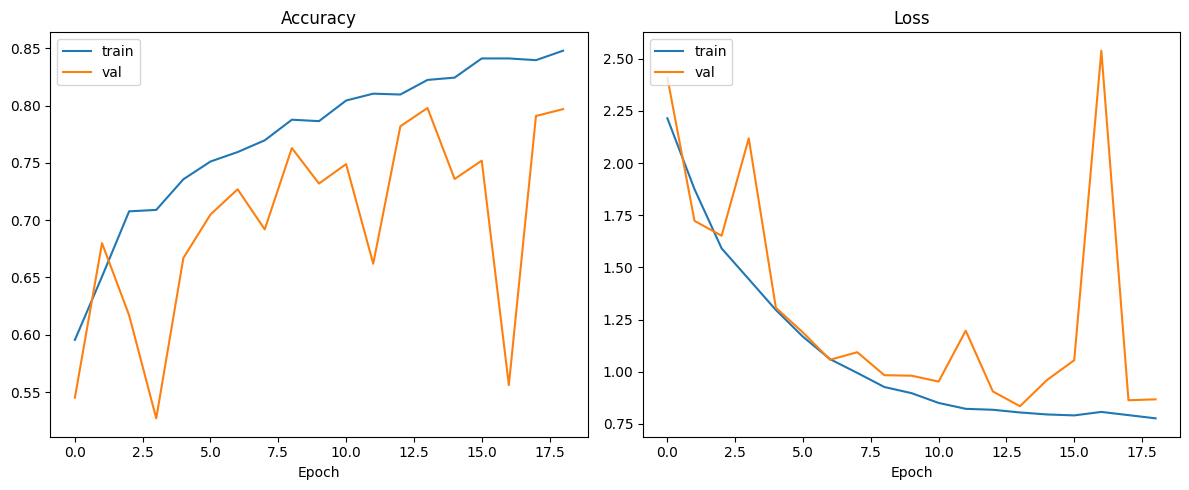

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='val')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='upper left')

# Loss
ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='val')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Ejercicio (1 punto - Ejercicio de evaluación continua)

*   Define y entrena una red neuronal combinando las mejoras de aprendizaje anteriores.
*   Calcula la métrica de _accuracy_ y la matriz de contingencia para el subconjunto de test.
